In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
test_path = os.path.join("titanic")
csvPath = os.path.join(test_path, "test.csv")
test = pd.read_csv(csvPath)
csvPath = os.path.join(test_path, "train.csv")

train = pd.read_csv(csvPath)
csvPath = os.path.join(test_path, "gender_submission.csv")
gender = pd.read_csv(csvPath) #"There's only 2"

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Practice First Guess:

In [7]:
#test['Survived'] = test.Pclass > 1
#print (test.head())

In [9]:
sns.barplot(x='Sex', y='Survived', data=test)

ValueError: Could not interpret input 'Survived'

In [10]:
sns.barplot(x='Pclass', y='Survived', data=test)

ValueError: Could not interpret input 'Survived'

C:\Users\Austin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


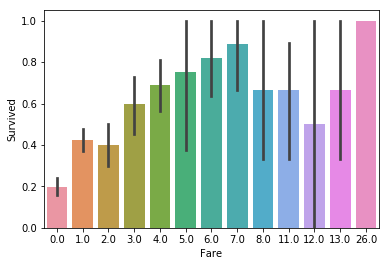

In [11]:
X = round(train.Fare/20)
sns.barplot(x=X, y='Survived', data=train)

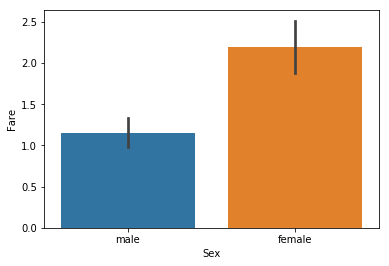

In [12]:
Y = round(train.Fare/20)
sns.barplot(x='Sex', y=Y, data=train)

# Actual Guess One:

In [13]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
sex = train.pivot_table(index="Sex",values="Survived")
sex

,Survived
Sex,
female,0.742038
male,0.188908


## Easy to see that women were more likely to survive

In [15]:
pClass = train.pivot_table(index='Pclass',values='Survived')
pClass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Easy to see that the better class the more likely you were to survive

## Guess that people in better class survived

In [16]:
test['Survived'] = test.Pclass < 3
test['Survived'] = test.Survived.apply(lambda x: int(x))
test[['PassengerId', 'Survived']].to_csv('titanic/FirstOrSecondClass.csv', index=False)
test[['PassengerId', 'Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


# I want to make a guess that would check if the Pclass is < 3 or sex == female but I couldn't figure that out

In [22]:
sib = train.pivot_table(index="SibSp",values="Survived")
sib

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [23]:
par = train.pivot_table(index="Parch",values="Survived")
par

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000
